### 1. Cohort Analysis

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

data = pd.read_csv('scanner_data.csv', index_col = 0, parse_dates = ['Date'])
data.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
1,2016-02-01,2547,1,X52,0EM7L,1.0,3.13
2,2016-02-01,822,2,2ML,68BRQ,1.0,5.46
3,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35
4,2016-02-01,3719,4,0H2,549KK,1.0,5.59
5,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88


In [5]:
# Check nulls

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131706 entries, 1 to 131706
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            131706 non-null  datetime64[ns]
 1   Customer_ID     131706 non-null  int64         
 2   Transaction_ID  131706 non-null  int64         
 3   SKU_Category    131706 non-null  object        
 4   SKU             131706 non-null  object        
 5   Quantity        131706 non-null  float64       
 6   Sales_Amount    131706 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 8.0+ MB


In [7]:
import datetime as dt

# Define a function that will parse the date

def get_month(x):
    return dt.datetime(x.year, x.month, 1)

data['InvoiceMonth'] = data['Date'].apply(get_month)
data['CohortMonth'] = data.groupby('Customer_ID')['InvoiceMonth'].transform('min')
data.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,InvoiceMonth,CohortMonth
1,2016-02-01,2547,1,X52,0EM7L,1.0,3.13,2016-02-01,2016-01-01
2,2016-02-01,822,2,2ML,68BRQ,1.0,5.46,2016-02-01,2016-01-01
3,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35,2016-02-01,2016-01-01
4,2016-02-01,3719,4,0H2,549KK,1.0,5.59,2016-02-01,2016-01-01
5,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88,2016-02-01,2016-02-01


In [8]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [9]:
# Get the integers for date parts from the 'InvoiceDay' column
invoice_year, invoice_month = get_date_int(data, 'InvoiceMonth')

# Get the integers for date parts from the 'CohortDay' column
cohort_year, cohort_month = get_date_int(data, 'CohortMonth')

# Calculate time difference 

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Extract the difference in days from all previous values
data['CohortIndex'] = years_diff * 12 + months_diff + 1
data.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,InvoiceMonth,CohortMonth,CohortIndex
1,2016-02-01,2547,1,X52,0EM7L,1.0,3.13,2016-02-01,2016-01-01,2
2,2016-02-01,822,2,2ML,68BRQ,1.0,5.46,2016-02-01,2016-01-01,2
3,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35,2016-02-01,2016-01-01,2
4,2016-02-01,3719,4,0H2,549KK,1.0,5.59,2016-02-01,2016-01-01,2
5,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88,2016-02-01,2016-02-01,1


In [12]:
# Or use unstack to create a pivot table
cohort_counts = data.groupby(['CohortMonth', 'CohortIndex'])['Customer_ID'].nunique().unstack()
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2016-01-01,3817.0,1104.0,971.0,899.0,823.0,697.0,718.0,723.0,701.0,635.0,697.0,716.0
2016-02-01,2759.0,550.0,515.0,511.0,436.0,420.0,444.0,457.0,448.0,463.0,435.0,NaN
2016-03-01,2619.0,568.0,532.0,479.0,476.0,456.0,469.0,466.0,459.0,505.0,NaN,NaN
2016-04-01,2292.0,436.0,399.0,366.0,368.0,416.0,363.0,391.0,389.0,NaN,NaN,NaN
2016-05-01,2180.0,315.0,314.0,292.0,321.0,336.0,310.0,325.0,NaN,NaN,NaN,NaN
2016-06-01,1446.0,169.0,184.0,204.0,189.0,193.0,209.0,NaN,NaN,NaN,NaN,NaN
2016-07-01,1238.0,128.0,138.0,149.0,128.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,1249.0,137.0,119.0,117.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,1554.0,205.0,179.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


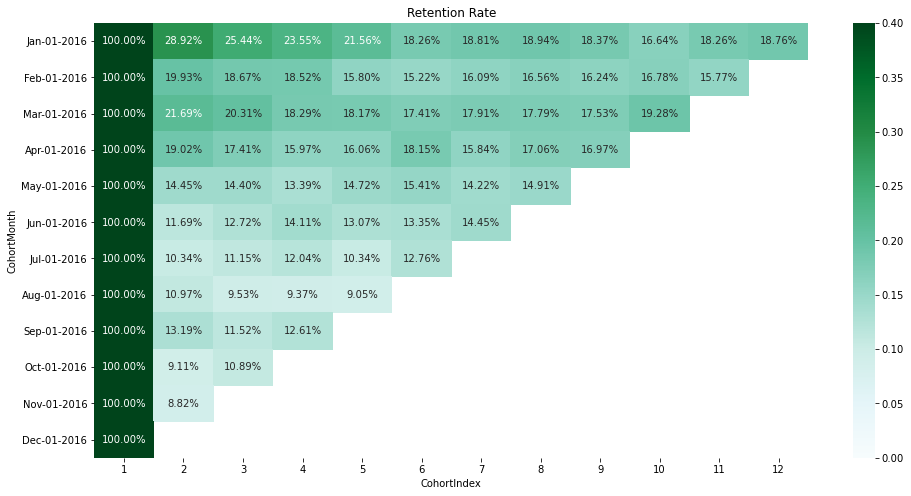

In [15]:
# Calculate retention rates
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Plot a heatmap to visualize the retention rates 

plt.figure(figsize=(16, 8))
g = sns.heatmap(data=retention, annot=True, fmt='.2%', vmin=0.0, vmax=0.4, cmap='BuGn')
g.set_yticklabels(retention.iloc[:].index.strftime('%b-%d-%Y'))
plt.yticks()
plt.title('Retention Rate')
plt.show()

In [17]:
# calculate the average price metric and analyze if there are any differences 
# in shopping patterns across time and across cohorts.

# Create a groupby object and pass the monthly cohort and cohort index as a list
average_price = data.groupby(['CohortMonth', 'CohortIndex'])['Sales_Amount'].mean().unstack()
average_price.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2016-01-01,11.6,12.5,12.2,12.6,12.2,12.5,12.2,11.3,12.3,11.8,11.9,12.6
2016-02-01,11.4,13.0,13.5,12.2,12.6,13.8,12.6,13.0,12.4,12.2,12.8,NaN
2016-03-01,11.6,12.9,12.1,13.0,12.4,12.9,12.3,12.6,12.7,12.8,NaN,NaN
2016-04-01,11.2,11.8,13.0,12.8,12.5,11.7,11.6,11.0,13.2,NaN,NaN,NaN
2016-05-01,11.4,11.5,12.9,12.3,13.3,11.8,12.7,12.7,NaN,NaN,NaN,NaN
2016-06-01,10.9,11.6,11.0,10.6,12.0,13.1,11.4,NaN,NaN,NaN,NaN,NaN
2016-07-01,11.1,11.8,12.6,12.1,11.5,11.9,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,11.6,13.9,12.6,11.8,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,11.3,11.6,10.8,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. RFMT Analysis

In [31]:
data['TotalSum'] = data['Quantity'] * data['Sales_Amount']
data

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
1,2016-02-01,2547,1,X52,0EM7L,1.0,3.13,2016-02-01,2016-01-01,2,3.13
2,2016-02-01,822,2,2ML,68BRQ,1.0,5.46,2016-02-01,2016-01-01,2,5.46
3,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35,2016-02-01,2016-01-01,2,6.35
4,2016-02-01,3719,4,0H2,549KK,1.0,5.59,2016-02-01,2016-01-01,2,5.59
5,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88,2016-02-01,2016-02-01,1,6.88
...,...,...,...,...,...,...,...,...,...,...,...
131702,2016-04-07,20203,32900,IEV,FO112,3.0,6.46,2016-04-01,2016-04-01,1,19.38
131703,2016-04-07,20203,32900,N8U,I36F2,1.0,4.50,2016-04-01,2016-04-01,1,4.50
131704,2016-04-07,20203,32900,U5F,4X8P4,1.0,5.19,2016-04-01,2016-04-01,1,5.19
131705,2016-04-07,20203,32900,0H2,ZVTO4,1.0,4.57,2016-04-01,2016-04-01,1,4.57


In [32]:
print(data['Date'].max())
print(data['Date'].min())

2016-12-31 00:00:00
2016-01-02 00:00:00


In [33]:
from datetime import timedelta

snapshot_date = data['Date'].max() + timedelta(days = 1)

# Calculate Recency, Frequency and Monetary value for each customer 
datamart = data.groupby(['Customer_ID']).agg({
    'Date': lambda x: (snapshot_date - x.max()).days,
    'SKU': 'count',
    'TotalSum': 'sum'})

# Rename the columns 
datamart.rename(columns={'Date': 'Recency',
                         'SKU': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

datamart['Tenure'] = data.groupby(['Customer_ID']).agg({'Date': lambda x: (snapshot_date - x.min()).days})
datamart

,Recency,Frequency,MonetaryValue,Tenure
Customer_ID,,,,
1,345,2,16.29,345
2,196,2,22.77,283
3,335,3,19.08,335
4,55,5,33.29,112
5,121,5,248.27,314
...,...,...,...,...
22621,81,2,17.19,81
22622,16,1,6.07,16
22623,11,2,225.87,11


In [34]:
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1)
f_labels = range(1, 4, 1)
m_labels = range(1, 4, 1)
t_labels = range(1, 4, 1)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(datamart['Frequency'], q=3, labels=f_labels)

# Assign these labels to three equal percentile groups
m_groups = pd.qcut(datamart['MonetaryValue'], q=3, labels=m_labels)

t_groups = pd.qcut(datamart['Tenure'], q=3, labels=t_labels)

# Create new columns R, F and M
datamart = datamart.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values, T=t_groups.values)

# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M','T']].sum(axis=1)
datamart

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,RFM_Score
Customer_ID,,,,,,,,,
1,345,2,16.29,345,1,1,2,3,7
2,196,2,22.77,283,2,1,2,2,7
3,335,3,19.08,335,1,2,2,3,8
4,55,5,33.29,112,3,2,2,1,8
5,121,5,248.27,314,2,2,3,3,10
...,...,...,...,...,...,...,...,...,...
22621,81,2,17.19,81,2,1,2,1,6
22622,16,1,6.07,16,3,1,1,1,6
22623,11,2,225.87,11,3,1,3,1,8


In [36]:
# Concatenate RFM quartile values to RFM_segment
def join_rfm(x):
    return str(x['R'])+str(x['F'])+str(x['M'])+str(x['T'])
    
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis = 1)
datamart

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,RFM_Score,RFM_Segment
Customer_ID,,,,,,,,,,
1,345,2,16.29,345,1,1,2,3,7,1123
2,196,2,22.77,283,2,1,2,2,7,2122
3,335,3,19.08,335,1,2,2,3,8,1223
4,55,5,33.29,112,3,2,2,1,8,3221
5,121,5,248.27,314,2,2,3,3,10,2233
...,...,...,...,...,...,...,...,...,...,...
22621,81,2,17.19,81,2,1,2,1,6,2121
22622,16,1,6.07,16,3,1,1,1,6,3111
22623,11,2,225.87,11,3,1,3,1,8,3131


In [37]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 11:
        return 'Top'
    
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 11)):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
datamart

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,RFM_Score,RFM_Segment,RFM_Level
Customer_ID,,,,,,,,,,,
1,345,2,16.29,345,1,1,2,3,7,1123,Low
2,196,2,22.77,283,2,1,2,2,7,2122,Low
3,335,3,19.08,335,1,2,2,3,8,1223,Middle
4,55,5,33.29,112,3,2,2,1,8,3221,Middle
5,121,5,248.27,314,2,2,3,3,10,2233,Middle
...,...,...,...,...,...,...,...,...,...,...,...
22621,81,2,17.19,81,2,1,2,1,6,2121,Low
22622,16,1,6.07,16,3,1,1,1,6,3111,Low
22623,11,2,225.87,11,3,1,3,1,8,3131,Middle


In [38]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfmt_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']}).round(1)

# Print the aggregated dataset
rfmt_level_agg

Recency Frequency MonetaryValue Tenure       
             mean      mean          mean   mean  count
RFM_Level                                              
Low         183.0       1.7          19.1  191.4  11732
Middle      136.9       5.6         121.4  236.0   7059
Top          46.1      19.0         438.0  310.5   3834

### 3. Customer Segmentation

In [39]:
datamart = datamart[['Recency', 'Frequency', 'MonetaryValue', 'Tenure']]

In [40]:
# Unskew the data

import numpy as np
datamart_log = np.log(datamart)

# K-means assumes means equal mean & equal variance, which is not the case with RFM data
# Normalize the variables

from sklearn.preprocessing import StandardScaler

datamart_norm = StandardScaler().fit_transform(datamart_log)

Text(0, 0.5, 'sse')

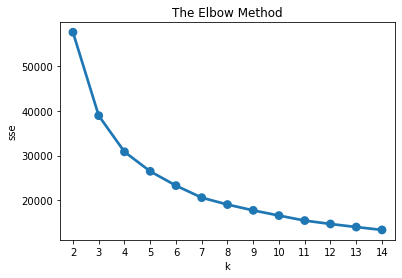

In [41]:
# Use elbow criterion method to choose the best cluster numbers

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Fit Kmeans and calculate sse for each k
sse = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(datamart_norm)
    sse[k] = kmeans.inertia_
    
# Plot sse for each k

sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('sse')  

In [42]:
# Chose 4 as the best number of clusters
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(datamart_norm)
cluster_labels = kmeans.labels_

In [44]:
# Summary Statistics for each cluster
# Creat a cluster label column in the original dataset

datamart_k = datamart.assign(Cluster = cluster_labels)
datamart_k

,Recency,Frequency,MonetaryValue,Tenure,Cluster
Customer_ID,,,,,
1,345,2,16.29,345,3
2,196,2,22.77,283,3
3,335,3,19.08,335,3
4,55,5,33.29,112,0
5,121,5,248.27,314,0
...,...,...,...,...,...
22621,81,2,17.19,81,1
22622,16,1,6.07,16,1
22623,11,2,225.87,11,1


In [45]:
# Calculate average RFM values and sizes for each cluster
datamart_k.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
})

Recency  Frequency MonetaryValue      Tenure      
               mean       mean          mean        mean count
Cluster                                                       
0        159.424301   5.435926    105.755890  263.588154  7226
1         36.631426   2.127061     28.587559   45.992887  3093
2         30.518608  19.603020    484.537518  280.470874  3708
3        222.308676   1.530472     12.936823  234.319609  8598

In [47]:
# Prepare data for a snake plot

datamart_normalized = pd.DataFrame(datamart_norm, index = datamart.index, columns = datamart.columns)
datamart_normalized['Cluster'] = datamart_k['Cluster']
datamart_melt = pd.melt(datamart_normalized.reset_index(), 
                       id_vars = ['Customer_ID', 'Cluster'],
                       value_vars = ['Recency', 'Frequency', 'MonetaryValue', 'Tenure'],
                       var_name = 'Attribute',
                       value_name = 'Value')
datamart_melt

,Customer_ID,Cluster,Attribute,Value
0,1,3,Recency,1.119616
1,2,3,Recency,0.648626
2,3,3,Recency,1.095115
3,4,0,Recency,-0.409904
4,5,0,Recency,0.246862
...,...,...,...,...
90495,22621,1,Tenure,-0.980702
90496,22622,1,Tenure,-2.942880
90497,22623,1,Tenure,-3.396196
90498,22624,3,Tenure,0.696481


<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

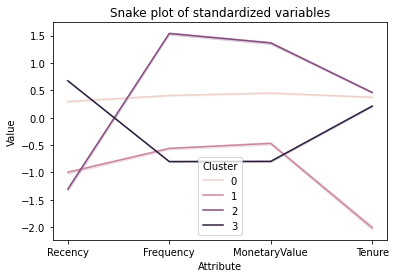

In [48]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x = 'Attribute', y = 'Value', hue = 'Cluster', data = datamart_melt)

Text(0.5, 1.0, 'Relative importance of attributes')

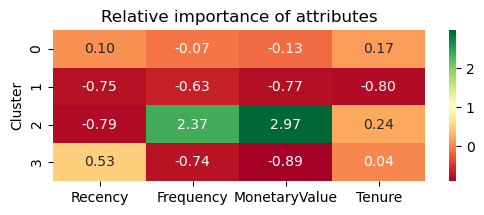

In [49]:
# Calculate relative importance of segment attributes
cluster_avg = datamart_k.groupby('Cluster').mean()
population_avg = datamart_k.drop('Cluster', axis = 1).mean()
relative_imp = cluster_avg / population_avg - 1

# Plot and analyze relative importance
# As a ratio moves away from 0, attribute importance for a segment increases

plt.figure(figsize = (6,2), dpi = 100)
sns.heatmap(relative_imp, annot = True, fmt = '.2f', cmap = 'RdYlGn')
plt.title('Relative importance of attributes')